# - 군집을 위한 데이터 전처리
* 키오스크 데이터 군집화 및 지표 확인

## 0. 필요 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 데이터 불러오기

In [3]:
kio_data=pd.read_csv("data/final_data.csv", index_col=0)
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,2,0,0,2,0,0,1,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,0,1,0,2,0,0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,3,3,0,0,0,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,3,0,0,0,0,0,0,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,2,0,0,2,0,0,0,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-05-19 17:00:00,여자,청년,서울,중립,분식,한식,중식,25.9,0.0,...,0,0,0,0,0,1,0,05-19,17,수
381,2021-05-19 19:00:00,여자,청년,서울,행복,양식,일식,한식,24.1,0.0,...,0,0,0,2,0,0,0,05-19,19,수
382,2021-05-19 20:00:00,여자,청년,서울,행복,일식,분식,한식,22.1,0.0,...,3,0,0,0,0,0,0,05-19,20,수
383,2021-05-19 20:00:00,여자,청년,서울,행복,양식,중식,분식,22.1,0.0,...,0,0,0,0,0,0,2,05-19,20,수


## 2. 데이터 전처리

### 1) 휴일 컬럼 생성
* 주말 : 0 / 평일 : 1

* 설문 데이터셋의 경우 기간이 짧아 모든 요일을 반영하기 어렵다고 판단

In [4]:
# 각 요일별 value counts

kio_data["요일"].value_counts()

화    148
일    147
월     47
수     43
Name: 요일, dtype: int64

In [5]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"요일"]=="일":
        kio_data.loc[i,"휴일"]= 0
    else:
        kio_data.loc[i,"휴일"]= 1
        
        
kio_data['휴일'] = kio_data['휴일'].astype('int')

In [6]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,0,0,2,0,0,1,05-16,14,일,0
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,1,0,2,0,0,05-16,15,일,0
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,3,3,0,0,0,05-16,15,일,0
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,0,0,0,0,0,0,05-16,15,일,0
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,0,0,2,0,0,0,05-16,16,일,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-05-19 17:00:00,여자,청년,서울,중립,분식,한식,중식,25.9,0.0,...,0,0,0,0,1,0,05-19,17,수,1
381,2021-05-19 19:00:00,여자,청년,서울,행복,양식,일식,한식,24.1,0.0,...,0,0,2,0,0,0,05-19,19,수,1
382,2021-05-19 20:00:00,여자,청년,서울,행복,일식,분식,한식,22.1,0.0,...,0,0,0,0,0,0,05-19,20,수,1
383,2021-05-19 20:00:00,여자,청년,서울,행복,양식,중식,분식,22.1,0.0,...,0,0,0,0,0,2,05-19,20,수,1


### 2) 요일

In [7]:
weekday = {'월': 0, '화': 1, '수': 2, '목':3, '금':4, '토':5, '일':6}

kio_data.replace({'요일':weekday}, inplace=True)
kio_data['요일'].unique()

array([6, 0, 1, 2], dtype=int64)

### 3) 성별
* 남자 : 0 , 여자 : 1인 범주형 변수로 변경

In [8]:
sex = {"남자": 0,"여자": 1}

kio_data.replace({'성별':sex}, inplace=True)

kio_data['성별'].unique()

array([0, 1], dtype=int64)

### 4) 나이

In [9]:
age = {"청소년": 0,"청년": 1,"중장년": 2,"노년":3}

kio_data.replace({'연령대': age}, inplace=True)
kio_data['연령대'].unique()

array([1, 2, 0, 3], dtype=int64)

### 5) 감정

In [10]:
feel = {"행복": 0,"중립": 1,"분노": 2,"우울":3}

kio_data.replace({'기분': feel}, inplace=True)

kio_data['기분'].unique()

array([0, 2, 1, 3], dtype=int64)

### 6) 강수량

* 강수 유무로 변경
* 비 X : 0 , 비 O : 1

In [11]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"강수량"] == 0:
        kio_data.loc[i,"비"] = 0
    else:
        kio_data.loc[i,"비"]=1
        
        
kio_data['비'] = kio_data['비'].astype('int')

In [12]:
## 온도 변경 
kio_data["구간온도"]=pd.qcut(kio_data["기온"],4,labels=[0,1,2,3])

### 7) 전운량 
* [기상청 전운량](https://www.weather.go.kr/weather/climate/past_cal.jsp)을 기준으로 하여 
* 맑음(0\~5) : 0 , 구름많음(6\~8) : 1, 흐림(9\~10) : 2으로 변경


In [13]:
kio_data.loc[(kio_data['전운량']>=0) & (kio_data['전운량']<=5), '전운량']=0 

kio_data.loc[(kio_data['전운량']>=6) & (kio_data['전운량']<=8), '전운량']=1

kio_data.loc[(kio_data['전운량']>=9) & (kio_data['전운량']<=10), '전운량']=2

kio_data['전운량'].unique()

array([2, 1, 0], dtype=int64)

## 3. 최종 데이터셋

In [14]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,구간온도
0,2021-05-16 14:00:00,0,1,수도권,0,한식,일식,중식,17.5,1.6,...,2,0,0,1,05-16,14,6,0,1,1
1,2021-05-16 15:00:00,1,2,서울,2,한식,중식,일식,18.5,1.4,...,0,2,0,0,05-16,15,6,0,1,1
2,2021-05-16 15:00:00,0,1,서울,1,일식,양식,한식,18.5,1.4,...,3,0,0,0,05-16,15,6,0,1,1
3,2021-05-16 15:00:00,1,1,서울,0,일식,한식,분식,18.5,1.4,...,0,0,0,0,05-16,15,6,0,1,1
4,2021-05-16 16:00:00,0,1,경상도,0,양식,일식,분식,20.6,2.6,...,2,0,0,0,05-16,16,6,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-05-19 17:00:00,1,1,서울,1,분식,한식,중식,25.9,0.0,...,0,0,1,0,05-19,17,2,1,0,3
381,2021-05-19 19:00:00,1,1,서울,0,양식,일식,한식,24.1,0.0,...,2,0,0,0,05-19,19,2,1,0,3
382,2021-05-19 20:00:00,1,1,서울,0,일식,분식,한식,22.1,0.0,...,0,0,0,0,05-19,20,2,1,0,3
383,2021-05-19 20:00:00,1,1,서울,0,양식,중식,분식,22.1,0.0,...,0,0,0,2,05-19,20,2,1,0,3


# - 군집

## 0. 군집을 위한 데이터 추출

In [15]:
cluster_data = kio_data.copy()[['성별', '연령대', '기분', '강수량', '전운량', '비', '휴일', '기압', '기온']]
cluster_data

,성별,연령대,기분,강수량,전운량,비,휴일,기압,기온
0,0,1,0,1.6,2,1,0,993.6,17.5
1,1,2,2,1.4,2,1,0,989.6,18.5
2,0,1,1,1.4,2,1,0,989.6,18.5
3,1,1,0,1.4,2,1,0,989.6,18.5
4,0,1,0,2.6,2,1,0,990.5,20.6
...,...,...,...,...,...,...,...,...,...
380,1,1,1,0.0,0,0,1,1000.6,25.9
381,1,1,0,0.0,0,0,1,1000.1,24.1
382,1,1,0,0.0,0,0,1,1001.1,22.1
383,1,1,0,0.0,0,0,1,1001.1,22.1


### 1. 상관 관계

In [16]:
cluster_data.corr()

,성별,연령대,기분,강수량,전운량,비,휴일,기압,기온
성별,1.000000,0.129912,0.018711,-0.209553,-0.303348,-0.275014,0.289282,0.291980,0.124421
연령대,0.129912,1.000000,-0.047558,-0.236632,-0.248121,-0.334921,0.373450,0.285061,0.035567
기분,0.018711,-0.047558,1.000000,0.064684,0.067181,0.028982,-0.008966,-0.037143,-0.013556
강수량,-0.209553,-0.236632,0.064684,1.000000,0.682810,0.778422,-0.860505,-0.837955,-0.222941
전운량,-0.303348,-0.248121,0.067181,0.682810,1.000000,0.828576,-0.728095,-0.797523,-0.537684
비,-0.275014,-0.334921,0.028982,0.778422,0.828576,1.000000,-0.827993,-0.851337,-0.415104
휴일,0.289282,0.373450,-0.008966,-0.860505,-0.728095,-0.827993,1.000000,0.922670,0.177555
기압,0.291980,0.285061,-0.037143,-0.837955,-0.797523,-0.851337,0.922670,1.000000,0.200570
기온,0.124421,0.035567,-0.013556,-0.222941,-0.537684,-0.415104,0.177555,0.200570,1.000000


In [17]:
import platform
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
    
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    

<AxesSubplot:>

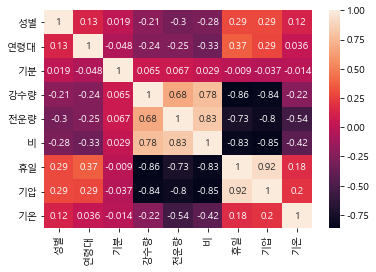

In [18]:
sns.heatmap(cluster_data.corr(), annot=True)

* 강수량, 전운량, 비 column과 휴일 간의 상관관계가 매우 높게 나옴
    * 이는 설문 조사 기간(2021-05-15 ~ 2021-05-22)의 주말에 계속 비가 왔기때문으로 보임
    * **휴일 컬럼을 사용하지 않는 것이 좋을 것으로 판단**"

In [19]:
## 휴일 컬럼 삭제
cluster_data.drop(['휴일','기압', '기온','강수량'] , axis=1, inplace=True)
cluster_data

,성별,연령대,기분,전운량,비
0,0,1,0,2,1
1,1,2,2,2,1
2,0,1,1,2,1
3,1,1,0,2,1
4,0,1,0,2,1
...,...,...,...,...,...
380,1,1,1,0,0
381,1,1,0,0,0
382,1,1,0,0,0
383,1,1,0,0,0


In [20]:
data = pd.get_dummies(cluster_data.astype('str'))
data

,성별_0,성별_1,연령대_0,연령대_1,연령대_2,연령대_3,기분_0,기분_1,기분_2,기분_3,전운량_0,전운량_1,전운량_2,비_0,비_1
0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1
4,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
381,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
382,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
383,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0


### 2. kmeans


In [21]:
from sklearn.cluster import KMeans

In [22]:
inertia_arr = []
k_range = range (2,51)

for k in k_range :
    
    Kmeans = KMeans(n_clusters=k, random_state=200)
    Kmeans.fit(data)
    inertia = Kmeans.inertia_
    
    print(f'k : {k} \t inertia : {inertia:.2f}')
    
    inertia_arr.append(inertia)

inertia_arr = np.array(inertia_arr)

k : 2 	 inertia : 767.66
k : 3 	 inertia : 659.77
k : 4 	 inertia : 568.47
k : 5 	 inertia : 509.20
k : 6 	 inertia : 477.61
k : 7 	 inertia : 436.34
k : 8 	 inertia : 415.29
k : 9 	 inertia : 391.47
k : 10 	 inertia : 348.95
k : 11 	 inertia : 335.87
k : 12 	 inertia : 307.77
k : 13 	 inertia : 291.72
k : 14 	 inertia : 279.04
k : 15 	 inertia : 260.97
k : 16 	 inertia : 253.08
k : 17 	 inertia : 240.18
k : 18 	 inertia : 227.34
k : 19 	 inertia : 214.58
k : 20 	 inertia : 200.80
k : 21 	 inertia : 194.53
k : 22 	 inertia : 184.65
k : 23 	 inertia : 173.40
k : 24 	 inertia : 165.30
k : 25 	 inertia : 157.01
k : 26 	 inertia : 148.54
k : 27 	 inertia : 141.16
k : 28 	 inertia : 134.26
k : 29 	 inertia : 126.06
k : 30 	 inertia : 119.19
k : 31 	 inertia : 114.44
k : 32 	 inertia : 108.43
k : 33 	 inertia : 102.12
k : 34 	 inertia : 96.30
k : 35 	 inertia : 91.29
k : 36 	 inertia : 86.24
k : 37 	 inertia : 81.02
k : 38 	 inertia : 75.87
k : 39 	 inertia : 70.91
k : 40 	 inertia : 64.04
k

## Elbow Method

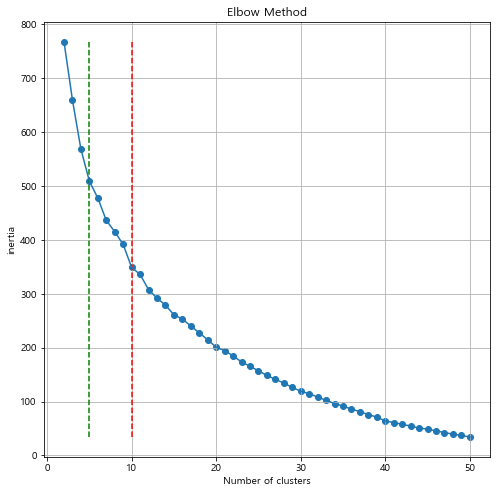

In [23]:
plt.figure(figsize=(8, 8))
plt.plot(k_range, inertia_arr)
plt.scatter(k_range, inertia_arr)
plt.vlines(5, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--',colors="g")
plt.vlines(10, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--',colors="r")

plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.grid()
plt.show()

## 군집 실루엣

In [24]:
from sklearn.metrics import silhouette_score

k_range = range(2,20)

best_n = -1
best_silhouette_score = -1

for k in k_range :
    
    kmeans = KMeans(n_clusters=k, random_state=200)
    kmeans.fit(data)
    clusters = kmeans.predict(data)
    
    score = silhouette_score(data, clusters)
    print("k :",k, "score :", score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score

print('best n :',best_n,'best score :', best_silhouette_score)

k : 2 score : 0.30140077651710606
k : 3 score : 0.27638583533292793
k : 4 score : 0.28110421488370013
k : 5 score : 0.3036116256800471
k : 6 score : 0.2983039576993439
k : 7 score : 0.3100917168682586
k : 8 score : 0.34089852041592295
k : 9 score : 0.34297429508686555
k : 10 score : 0.38022961851249404
k : 11 score : 0.3953892267260714
k : 12 score : 0.4280479326538199
k : 13 score : 0.43853262930337394
k : 14 score : 0.4511856854539297
k : 15 score : 0.46350593068274065
k : 16 score : 0.4730817775109289
k : 17 score : 0.4912999579979027
k : 18 score : 0.5113308104509423
k : 19 score : 0.5313347359759804
best n : 19 best score : 0.5313347359759804


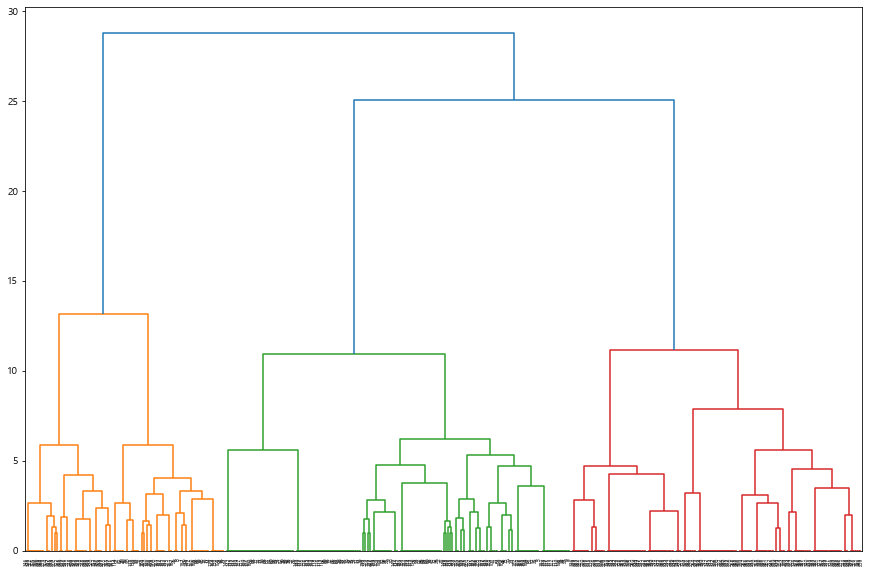

In [25]:
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(cluster_data)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
plt.figure(figsize=(15, 10))
dn = dendrogram(linkage_array)
plt.xticks(rotation=90)
plt.show()

## 8개로 군집 실행

In [26]:

kmeans = KMeans(n_clusters=8) #8 개의 군집으로 분류
kmeans.fit(data)
print(f'8 Cluster inerita : {kmeans.inertia_:.2f}')

print(f"Cluster memberships:\n{kmeans.labels_}")

8 Cluster inerita : 416.19
Cluster memberships:
[1 3 1 3 1 3 1 3 1 3 3 1 2 6 1 1 3 3 1 3 3 6 3 1 1 3 1 3 1 6 2 6 1 2 6 6 2
 6 2 6 2 3 2 1 6 3 1 6 2 6 2 2 2 6 2 2 1 3 2 6 2 6 2 2 2 6 6 2 2 3 2 6 6 2
 2 3 6 2 1 1 1 3 3 1 1 1 1 3 1 6 3 3 1 3 1 1 6 2 2 2 2 2 3 3 3 1 1 6 3 3 1
 1 6 6 2 2 6 2 6 6 2 2 1 6 6 6 6 2 6 2 2 2 2 2 3 1 3 6 2 3 6 3 2 6 2 5 1 3
 6 2 3 7 7 7 7 7 3 7 3 3 1 3 5 7 3 3 3 3 3 3 1 1 1 1 1 1 3 1 1 1 2 1 3 1 1
 1 1 3 6 3 3 3 4 5 5 7 0 5 3 7 7 5 7 5 7 7 4 4 4 4 4 0 4 4 0 0 4 4 0 4 0 0
 0 0 5 4 4 4 4 0 0 0 4 4 0 0 7 0 4 4 0 5 0 4 0 4 4 4 4 4 5 7 5 0 4 0 0 4 0
 4 4 5 4 0 4 4 4 0 4 4 4 4 4 4 0 4 4 0 4 4 4 5 4 0 4 4 7 4 7 4 4 5 4 4 4 4
 5 4 0 0 4 0 4 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 7 0 0 0 4 7 0 4 4 4 4 4 5 4 4
 0 4 4 0 4 4 7 7 4 4 4 0 0 4 0 0 4 0 7 0 4 0 0 7 7 7 4 4 4 7 7 4 7 4 4 5 4
 5 4 7 7 3 3 7 4 4 5 4 4 4 4 7]


## 8개 군집시 군집 간 거리

In [27]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(kmeans.cluster_centers_, metric='euclidean')), columns=set(kmeans.labels_))
row_dist

,0,1,2,3,4,5,6,7
0,0.000000,2.263058,2.383756,2.446082,1.543540,1.696386,2.182965,1.399981
1,2.263058,0.000000,1.446662,1.452200,2.530539,1.788011,1.544089,1.722411
2,2.383756,1.446662,0.000000,1.956579,2.643862,2.191061,1.275356,2.378764
3,2.446082,1.452200,1.956579,0.000000,1.871045,2.217427,1.988143,2.112410
4,1.543540,2.530539,2.643862,1.871045,0.000000,1.994824,2.509473,1.740976
5,1.696386,1.788011,2.191061,2.217427,1.994824,0.000000,2.551753,1.211956
6,2.182965,1.544089,1.275356,1.988143,2.509473,2.551753,0.000000,2.230201
7,1.399981,1.722411,2.378764,2.112410,1.740976,1.211956,2.230201,0.000000


## 각 군집 중심점 값

In [28]:
kmeans.cluster_centers_

array([[ 1.00000000e+00,  1.66533454e-16,  1.08695652e-01,
         2.22044605e-16,  8.26086957e-01,  6.52173913e-02,
         6.30434783e-01,  1.73913043e-01,  4.34782609e-02,
         1.52173913e-01,  7.60869565e-01,  2.17391304e-01,
         2.17391304e-02,  1.00000000e+00, -5.55111512e-17],
       [ 1.00000000e+00, -1.11022302e-16,  3.33066907e-16,
         9.40000000e-01,  6.00000000e-02, -1.73472348e-18,
         3.00000000e-01,  4.20000000e-01, -6.93889390e-18,
         2.80000000e-01,  5.55111512e-17,  6.00000000e-02,
         9.40000000e-01,  3.33066907e-16,  1.00000000e+00],
       [ 1.00000000e+00,  5.55111512e-17,  9.77777778e-01,
        -5.55111512e-17,  2.22222222e-02, -1.73472348e-18,
         1.66533454e-16,  7.55555556e-01,  1.33333333e-01,
         1.11111111e-01,  0.00000000e+00,  2.22222222e-02,
         9.77777778e-01,  3.33066907e-16,  1.00000000e+00],
       [ 6.66133815e-16,  1.00000000e+00,  3.70370370e-02,
         7.40740741e-01,  2.03703704e-01,  1.85185185

## 전체 데이터에서 메뉴컬럼만 추출

In [29]:
menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥', '파스타',
'스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']


## 추출한 컬럼과 군집 및 라벨링이 된 자료 합치기

In [30]:
final_data = kio_data.copy()

final_data['label'] = kmeans.labels_

final_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,구간온도,label
0,2021-05-16 14:00:00,0,1,수도권,0,한식,일식,중식,17.5,1.6,...,0,0,1,05-16,14,6,0,1,1,1
1,2021-05-16 15:00:00,1,2,서울,2,한식,중식,일식,18.5,1.4,...,2,0,0,05-16,15,6,0,1,1,3
2,2021-05-16 15:00:00,0,1,서울,1,일식,양식,한식,18.5,1.4,...,0,0,0,05-16,15,6,0,1,1,1
3,2021-05-16 15:00:00,1,1,서울,0,일식,한식,분식,18.5,1.4,...,0,0,0,05-16,15,6,0,1,1,3
4,2021-05-16 16:00:00,0,1,경상도,0,양식,일식,분식,20.6,2.6,...,0,0,0,05-16,16,6,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-05-19 17:00:00,1,1,서울,1,분식,한식,중식,25.9,0.0,...,0,1,0,05-19,17,2,1,0,3,4
381,2021-05-19 19:00:00,1,1,서울,0,양식,일식,한식,24.1,0.0,...,0,0,0,05-19,19,2,1,0,3,4
382,2021-05-19 20:00:00,1,1,서울,0,일식,분식,한식,22.1,0.0,...,0,0,0,05-19,20,2,1,0,3,4
383,2021-05-19 20:00:00,1,1,서울,0,양식,중식,분식,22.1,0.0,...,0,0,2,05-19,20,2,1,0,3,4


In [31]:
tt = final_data.loc[final_data['label'] == 7 ]

feel = {"행복": 0,"중립": 1,"분노": 2,"우울":3}
age = {"청소년": 0,"청년": 1,"중장년": 2,"노년":3}

# ['성별', '연령대', '기분', '전운량', '비']
# 맑음(0\~5) : 0 , 구름많음(6\~8) : 1, 흐림(9\~10) : 2으로 변경

tt['비'].value_counts()



0    32
Name: 비, dtype: int64

In [32]:
final_data.loc[final_data['연령대']==3]

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,구간온도,label
20,2021-05-16 16:00:00,1,3,서울,1,한식,일식,분식,17.7,4.8,...,0,0,0,05-16,16,6,0,1,1,3
216,2021-05-18 12:00:00,1,3,서울,0,일식,분식,한식,20.5,0.0,...,0,0,0,05-18,12,1,1,0,2,4
240,2021-05-18 13:00:00,0,3,서울,0,한식,중식,일식,22.2,0.0,...,0,2,0,05-18,13,1,1,0,3,0
324,2021-05-18 18:00:00,0,3,서울,0,한식,일식,중식,22.6,0.0,...,0,0,1,05-18,18,1,1,0,3,0
345,2021-05-19 06:00:00,0,3,수도권,0,한식,양식,일식,10.7,0.0,...,0,0,0,05-19,6,2,1,0,0,0


## 추천

In [33]:
kio_menu_result.groupby(["label"]).mean().iloc[0].sort_values(ascending=False).head(3)

NameError: name 'kio_menu_result' is not defined

## AgglomerativeClustering(계층적 클러스터링)

## 알맞는 linkages  설정,군집갯수 구하기

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

linkages = ["single", "average","complete"]
k_range = range(2,11)
k_silhouette_df = pd.DataFrame(k_range, columns=["k"])

for connect in linkages :
    
    k_silhouette = []
    print(connect)
    
    for k in k_range :
        
        clustering = AgglomerativeClustering(n_clusters=k, linkage=connect)
        clusters = clustering.fit_predict(data)
        score = silhouette_score(data,clusters)
        
        print(f'k : {k} \t score : {score:.3f}')
        
        result = [score]
        k_silhouette.append(result)
        
    score_df = pd.DataFrame(k_silhouette, columns = [connect + '_score'])
    k_silhouette_df = pd.concat([k_silhouette_df, score_df],axis=1)

## 실루엣 결과 (값이 높을수록 좋음)

In [ ]:
k_silhouette_df

 전체적으로 average_score가 잘나왔고 
 k 값은 7이 가장 적당해보임

## 7로 군집

In [34]:
from sklearn.cluster import AgglomerativeClustering

clustering=AgglomerativeClustering(n_clusters = 7, linkage="complete").fit(data)

In [35]:
clustering

AgglomerativeClustering(linkage='complete', n_clusters=7)

In [36]:
clustering.labels_

array([2, 2, 6, 2, 2, 2, 6, 2, 6, 2, 2, 6, 6, 6, 6, 6, 2, 2, 6, 2, 2, 2,
       2, 2, 2, 2, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6,
       6, 2, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 2, 6, 2, 6, 6, 6, 2, 6, 6, 6, 6, 6, 2, 2, 6, 6, 6, 6, 2,
       6, 6, 2, 2, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 6, 2, 2, 2, 2,
       2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 5, 2, 6, 6, 2, 6, 5, 6, 6, 6, 3, 5, 5, 6, 6, 5, 1, 1, 1,
       1, 1, 0, 1, 0, 2, 6, 0, 3, 1, 2, 2, 2, 0, 2, 2, 6, 2, 6, 6, 6, 2,
       2, 2, 2, 6, 6, 2, 2, 6, 6, 5, 6, 2, 2, 2, 2, 5, 0, 3, 3, 1, 1, 3,
       4, 1, 1, 3, 1, 3, 1, 1, 0, 0, 0, 0, 4, 1, 0, 0, 4, 1, 0, 4, 1, 0,
       1, 1, 1, 1, 3, 0, 0, 4, 4, 1, 1, 4, 0, 0, 1, 4, 1, 1, 4, 4, 1, 3,
       1, 4, 1, 0, 0, 0, 4, 0, 3, 1, 3, 1, 0, 4, 1, 0, 1, 0, 0, 3, 0, 4,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 3, 0, 1, 4, 0,

## 군집된 라벨 달아주기

In [37]:
compete_data = kio_data.copy()

compete_data['label'] = kmeans.labels_

compete_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,구간온도,label
0,2021-05-16 14:00:00,0,1,수도권,0,한식,일식,중식,17.5,1.6,...,0,0,1,05-16,14,6,0,1,1,1
1,2021-05-16 15:00:00,1,2,서울,2,한식,중식,일식,18.5,1.4,...,2,0,0,05-16,15,6,0,1,1,3
2,2021-05-16 15:00:00,0,1,서울,1,일식,양식,한식,18.5,1.4,...,0,0,0,05-16,15,6,0,1,1,1
3,2021-05-16 15:00:00,1,1,서울,0,일식,한식,분식,18.5,1.4,...,0,0,0,05-16,15,6,0,1,1,3
4,2021-05-16 16:00:00,0,1,경상도,0,양식,일식,분식,20.6,2.6,...,0,0,0,05-16,16,6,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-05-19 17:00:00,1,1,서울,1,분식,한식,중식,25.9,0.0,...,0,1,0,05-19,17,2,1,0,3,4
381,2021-05-19 19:00:00,1,1,서울,0,양식,일식,한식,24.1,0.0,...,0,0,0,05-19,19,2,1,0,3,4
382,2021-05-19 20:00:00,1,1,서울,0,일식,분식,한식,22.1,0.0,...,0,0,0,05-19,20,2,1,0,3,4
383,2021-05-19 20:00:00,1,1,서울,0,양식,중식,분식,22.1,0.0,...,0,0,2,05-19,20,2,1,0,3,4


###  군집으로 메뉴 추천 결과

In [43]:
tt = compete_data.loc[compete_data['label'] == 0 ]

feel = {"행복": 0,"중립": 1,"분노": 2,"우울":3}
age = {"청소년": 0,"청년": 1,"중장년": 2,"노년":3}

# ['성별', '연령대', '기분', '전운량', '비']
# 맑음(0\~5) : 0 , 구름많음(6\~8) : 1, 흐림(9\~10) : 2으로 변경

tt['기분'].value_counts()

    
    

0    29
1     8
3     7
2     2
Name: 기분, dtype: int64

In [58]:
compete_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일,비,구간온도,label
0,2021-05-16 14:00:00,0,1,수도권,0,한식,일식,중식,17.5,1.6,...,0,0,1,05-16,14,6,0,1,1,1
1,2021-05-16 15:00:00,1,2,서울,2,한식,중식,일식,18.5,1.4,...,2,0,0,05-16,15,6,0,1,1,3
2,2021-05-16 15:00:00,0,1,서울,1,일식,양식,한식,18.5,1.4,...,0,0,0,05-16,15,6,0,1,1,1
3,2021-05-16 15:00:00,1,1,서울,0,일식,한식,분식,18.5,1.4,...,0,0,0,05-16,15,6,0,1,1,3
4,2021-05-16 16:00:00,0,1,경상도,0,양식,일식,분식,20.6,2.6,...,0,0,0,05-16,16,6,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-05-19 17:00:00,1,1,서울,1,분식,한식,중식,25.9,0.0,...,0,1,0,05-19,17,2,1,0,3,4
381,2021-05-19 19:00:00,1,1,서울,0,양식,일식,한식,24.1,0.0,...,0,0,0,05-19,19,2,1,0,3,4
382,2021-05-19 20:00:00,1,1,서울,0,일식,분식,한식,22.1,0.0,...,0,0,0,05-19,20,2,1,0,3,4
383,2021-05-19 20:00:00,1,1,서울,0,양식,중식,분식,22.1,0.0,...,0,0,2,05-19,20,2,1,0,3,4


In [102]:

# 각 군집 별 원하는 데이터를 plotting하는 함수

def label_plotting(data=None, label=0):
    '''
    params : 
        1) data : 넣고 싶은 label이 있는 데이터
        2) label : 보고 싶은 label(군집)
        
    return :
        각 군집 별 열(['성별' , '연령대', '기분', '전운량', '비'])의 value_counts bar 그래프
    
    '''
    
    ## 기초 subplot 생성
    fig, axes = plt.subplots(3, 2, figsize=(10, 10))


    # 보고 싶은 열
    ax_list = ['성별' , '연령대', '기분', '전운량', '비']

    # x label을 위한 딕셔너리 정의
    ax_dic = {'성별' : ['남', '여'] , '연령대': ['청소년', '청년', '중장년', '노년'] ,
             '기분': ['행복', '중립', '분노', '우울'], '전운량' : ['맑음', '구름조금', '흐림'],
             '비': ['비안옴', '비옴']}


    # 그리기 위한 ravel()
    axis = axes.ravel()
    plt.suptitle(str(label) + ' 군집에 해당하는 데이터의 value_counts',fontsize=20)
    
    # 그래프 그리는 코드
    for i, ax in enumerate(ax_dic.keys()):
        
        
        # label에 해당하는 데이터 슬라이싱
        tmp_df = data.loc[data['label'] == label]

        # 열에 따른 value_counts()
        tmp = tmp_df[ax].value_counts()

        # 그래프 생성
        tmp.plot(kind='bar', ax=axis[i])

        # xlabel을 위한 feature_name
        feature_name = [ax_dic[ax][n] for n in tmp.index]

        # label 생성
        axis[i].set_xticklabels(feature_name, rotation=45)
        axis[i].grid() # 격자
        axis[i].set_title(str(ax))
        plt.tight_layout() 

    plt.show()

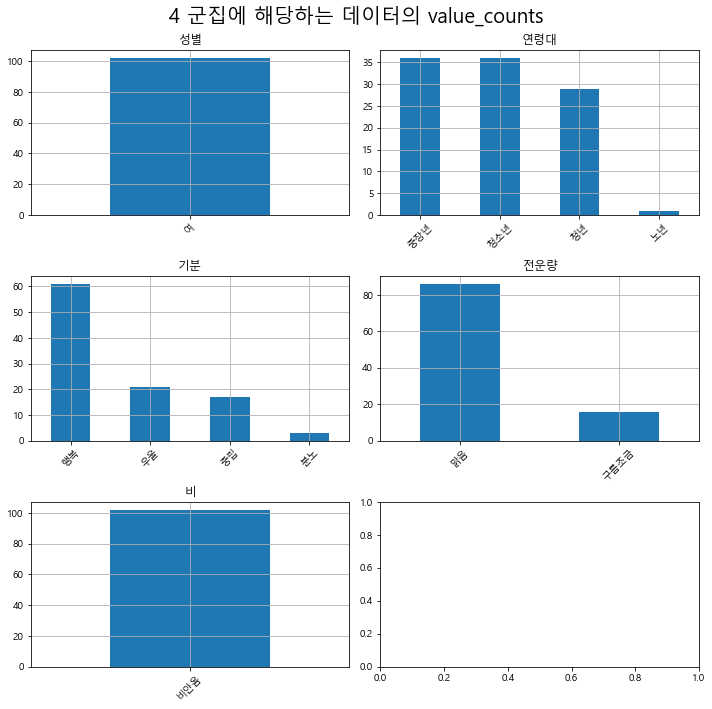

In [103]:
label_plotting(data=compete_data, label=4)

## 계층 클러스터시 결과

In [ ]:
kio_menu_result1.groupby(["label"]).mean().iloc[0].sort_values(ascending=False).head(3)

## kmeans 클러스터시 결과

In [ ]:
kio_menu_result.groupby(["label"]).mean().iloc[0].sort_values(ascending=False).head(3)

## DBSCAN

In [ ]:
cluster_data2

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
D_clustering = DBSCAN(eps=1.1, min_samples=2).fit(cluster_data2)


D_clustering

In [ ]:
D_clustering.labels_